# Машинное обучение, ФКН ВШЭ

## Семинар 2. Знакомство с NumPy и Scikit-Learn

# NumPy

**NumPy** — библиотека языка Python, позволяющая [удобно] работать с многомерными массивами и матрицами, содержащая математические функции. Кроме того, NumPy позволяет векторизовать многие вычисления, имеющие место в машинном обучении.

 - [numpy](http://www.numpy.org)
 - [numpy tutorial](http://cs231n.github.io/python-numpy-tutorial/)
 - [100 numpy exercises](http://www.labri.fr/perso/nrougier/teaching/numpy.100/)

In [1]:
import numpy as np

Основным типом данных NumPy является многомерный массив элементов одного типа — [numpy.ndarray](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.array.html). Каждый подобный массив имеет несколько *измерений* или *осей* — в частности, вектор (в классическом понимании) является одномерным массивом и имеет 1 ось, матрица является двумерным массивом и имеет 2 оси и т.д.

In [2]:
vec = np.array([1, 2, 3])
vec.ndim # количество осей

1

In [3]:
mat = np.array([[1, 2, 3], [4, 5, 6]])
mat.ndim

2

Чтобы узнать длину массива по каждой из осей, можно воспользоваться атрибутом shape:

In [4]:
vec.shape

(3,)

Чтобы узнать тип элементов и их размер в байтах:

In [5]:
mat.dtype.name

'int64'

In [6]:
mat.itemsize

8

## Создание массивов

* Передать итерируемый объект в качестве параметра функции array (можно также явно указать тип элементов):

In [7]:
A = np.array([1, 2, 3])
A, A.dtype

(array([1, 2, 3]), dtype('int64'))

In [8]:
A = np.array([1, 2, 3], dtype=float)
A, A.dtype

(array([1., 2., 3.]), dtype('float64'))

* Создание массивов специального вида при помощи функций zeros, ones, empty, identity:

In [9]:
np.zeros((3,))

array([0., 0., 0.])

In [10]:
np.ones((3, 4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [11]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [12]:
np.empty((2, 5))

array([[1.72723371e-077, 1.72723371e-077, 2.37663529e-312,
        2.56761491e-312, 8.48798317e-313],
       [9.33678148e-313, 1.12465777e-312, 8.70018274e-313,
        1.72723371e-077, 6.99673883e-309]])

Обратите внимание, что содержимое массива, созданного при помощи функции empty, **не инициализируется**, то есть в качестве значений он **может содержать "мусор"**.

* Создание последовательностей при помощи функций arange (в качестве парметров принимает левую и правую границы последовательности и **шаг**) и linspace (принимает левую и правую границы и **количество элементов**):

In [13]:
np.arange(2, 20, 3) # аналогично стандартной функции range python, правая граница не включается

array([ 2,  5,  8, 11, 14, 17])

In [14]:
np.arange(2.5, 8.7, 0.9) # но может работать и с вещественными числами

array([2.5, 3.4, 4.3, 5.2, 6.1, 7. , 7.9])

In [15]:
np.linspace(2, 18, 14) # правая граница включается (по умолчанию)

array([ 2.        ,  3.23076923,  4.46153846,  5.69230769,  6.92307692,
        8.15384615,  9.38461538, 10.61538462, 11.84615385, 13.07692308,
       14.30769231, 15.53846154, 16.76923077, 18.        ])

* Для изменения размеров существующего массива можно воспользоваться функцией reshape (при этом количество элементов должно оставаться неизменным):

In [16]:
np.arange(9).reshape(3, 3)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

Вместо значения длины массива по одному из измерений можно указать -1 — в этом случае значение будет рассчитано автоматически:

In [17]:
np.arange(8).reshape(2, -1)

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

* Транспонирование существующего массива:

In [18]:
C = np.arange(6).reshape(2, -1)
C

array([[0, 1, 2],
       [3, 4, 5]])

In [19]:
C.T

array([[0, 3],
       [1, 4],
       [2, 5]])

* Объединение существующих массивов по заданной оси:

In [20]:
A = np.arange(6).reshape(2, -1)
np.hstack((A, A**2))

array([[ 0,  1,  2,  0,  1,  4],
       [ 3,  4,  5,  9, 16, 25]])

In [21]:
np.vstack((A, A**2))

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 0,  1,  4],
       [ 9, 16, 25]])

In [22]:
np.concatenate((A, A**2), axis=1)

array([[ 0,  1,  2,  0,  1,  4],
       [ 3,  4,  5,  9, 16, 25]])

* Повторение существующего массива

In [23]:
a = np.arange(3)
np.tile(a, (2, 2))

array([[0, 1, 2, 0, 1, 2],
       [0, 1, 2, 0, 1, 2]])

In [24]:
np.tile(a, (4, 1))

array([[0, 1, 2],
       [0, 1, 2],
       [0, 1, 2],
       [0, 1, 2]])

## Базовые операции

* Базовые арифметические операции над массивами выполняются поэлементно:

In [25]:
A = np.arange(9).reshape(3, 3)
B = np.arange(1, 10).reshape(3, 3)

In [26]:
print(A)
print(B)

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [27]:
A + B

array([[ 1,  3,  5],
       [ 7,  9, 11],
       [13, 15, 17]])

In [28]:
A * 1.0 / B

array([[0.        , 0.5       , 0.66666667],
       [0.75      , 0.8       , 0.83333333],
       [0.85714286, 0.875     , 0.88888889]])

In [29]:
A + 1

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [30]:
3 * A

array([[ 0,  3,  6],
       [ 9, 12, 15],
       [18, 21, 24]])

In [31]:
A ** 2

array([[ 0,  1,  4],
       [ 9, 16, 25],
       [36, 49, 64]])

Отдельно обратим внимание на то, что умножение массивов также является **поэлементным**, а не матричным:

In [32]:
A * B

array([[ 0,  2,  6],
       [12, 20, 30],
       [42, 56, 72]])

Для выполнения матричного умножения необходимо использовать функцию dot:

In [33]:
A.dot(B)

array([[ 18,  21,  24],
       [ 54,  66,  78],
       [ 90, 111, 132]])

Поскольку операции выполняются поэлементно, операнды бинарных операций должны иметь одинаковый размер. Тем не менее, операция может быть корректно выполнена, если размеры операндов таковы, что они могут быть расширены до одинаковых размеров. Данная возможность называется [broadcasting](http://www.scipy-lectures.org/intro/numpy/operations.html#broadcasting):
![](https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png)

In [34]:
np.tile(np.arange(0, 40, 10), (3, 1)).T + np.array([0, 1, 2])

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

* Универсальные функции (sin, cos, exp и т.д.) также применяются поэлементно:

In [35]:
np.exp(A)

array([[1.00000000e+00, 2.71828183e+00, 7.38905610e+00],
       [2.00855369e+01, 5.45981500e+01, 1.48413159e+02],
       [4.03428793e+02, 1.09663316e+03, 2.98095799e+03]])

* Некоторые операции над массивами (например, вычисления минимума, максимума, суммы элементов) выполняются над всеми элементами вне зависимости от формы массива, однако при указании оси выполняются вдоль нее (например, для нахождения максимума каждой строки или каждого столбца):

In [36]:
A

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [37]:
A.min()

0

In [38]:
A.max(axis=0)

array([6, 7, 8])

In [39]:
A.sum(axis=1)

array([ 3, 12, 21])

## Индексация

Для доступа к элементам может использоваться [много различных способов](http://docs.scipy.org/doc/numpy/reference/arrays.indexing.html), рассмотрим основные.

* Для индексации могут использоваться конкретные значения индексов и срезы (slice), как и в стандартных типах Python. Для многомерных массивов индексы для различных осей разделяются запятой. Если для многомерного массива указаны индексы не для всех измерений, недостающие заполняются полным срезом (:).

In [40]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [41]:
a[2:5]

array([2, 3, 4])

In [42]:
a[3:8:2]

array([3, 5, 7])

In [43]:
A = np.arange(81).reshape(9, -1)
A

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23, 24, 25, 26],
       [27, 28, 29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42, 43, 44],
       [45, 46, 47, 48, 49, 50, 51, 52, 53],
       [54, 55, 56, 57, 58, 59, 60, 61, 62],
       [63, 64, 65, 66, 67, 68, 69, 70, 71],
       [72, 73, 74, 75, 76, 77, 78, 79, 80]])

In [44]:
A[2:4]

array([[18, 19, 20, 21, 22, 23, 24, 25, 26],
       [27, 28, 29, 30, 31, 32, 33, 34, 35]])

In [45]:
A[:, 2:4]

array([[ 2,  3],
       [11, 12],
       [20, 21],
       [29, 30],
       [38, 39],
       [47, 48],
       [56, 57],
       [65, 66],
       [74, 75]])

In [46]:
A[2:4, 2:4]

array([[20, 21],
       [29, 30]])

In [47]:
A[-1]

array([72, 73, 74, 75, 76, 77, 78, 79, 80])

* Также может использоваться индексация при помощи списков индексов (по каждой из осей):

In [48]:
A = np.arange(81).reshape(9, -1)
A

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23, 24, 25, 26],
       [27, 28, 29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42, 43, 44],
       [45, 46, 47, 48, 49, 50, 51, 52, 53],
       [54, 55, 56, 57, 58, 59, 60, 61, 62],
       [63, 64, 65, 66, 67, 68, 69, 70, 71],
       [72, 73, 74, 75, 76, 77, 78, 79, 80]])

In [49]:
A[[2, 4, 5], [0, 1, 3]]

array([18, 37, 48])

* Может также применяться логическая индексация (при помощи логических массивов):

In [50]:
A = np.arange(11)
A

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [51]:
A[A % 5 != 3]

array([ 0,  1,  2,  4,  5,  6,  7,  9, 10])

In [52]:
A[np.logical_and(A != 7, A % 5 != 3)] # также можно использовать логические операции

array([ 0,  1,  2,  4,  5,  6,  9, 10])

## Примеры

In [53]:
A = np.arange(120).reshape(10, -1)
A

array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11],
       [ 12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23],
       [ 24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35],
       [ 36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47],
       [ 48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59],
       [ 60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71],
       [ 72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83],
       [ 84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95],
       [ 96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107],
       [108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]])

1. Выбрать все четные строки матрицы A.
2. Составить одномерный массив из всех не делящихся на 3 элементов нечетных столбцов А.
3. Посчитать сумму диагональных элементов A.

In [54]:
# Your code here

## Зачем?

Зачем необходимо использовать NumPy, если существуют стандартные списки/кортежи и циклы?

Причина заключается в скорости работы. Попробуем посчитать сумму поэлементых произведений 2 больших векторов:

In [55]:
import time

A_quick_arr = np.random.normal(size = (1000000,))
B_quick_arr = np.random.normal(size = (1000000,))

A_slow_list, B_slow_list = list(A_quick_arr), list(B_quick_arr)

In [56]:
start = time.clock()
ans = 0
for i in range(len(A_slow_list)):
    ans += A_slow_list[i] * B_slow_list[i]
print(time.clock() - start) # время выполнения в секундах

0.2497830000000001


In [57]:
start = time.clock()
ans = sum([A_slow_list[i] * B_slow_list[i] for i in range(1000000)])
print(time.clock() - start)

0.19528900000000027


In [58]:
start = time.clock()
ans = np.sum(A_quick_arr * B_quick_arr)
print(time.clock() - start)

0.0073430000000000994


In [59]:
start = time.clock()
ans = A_quick_arr.dot(B_quick_arr)
print(time.clock() - start)

0.0022780000000000022


# Scikit-Learn 

Scikit-learn $-$ это библиотека, в которой реализованы основные алгоритмы машинного обучения. Также реализованы методы для подбора гиепрпараметров (напр. кросс-валидации) и обработки данных. У всех алгоритмов унифицированный интерфейс, так что вы можете легко пробовать различные методы и добавлять свои.

На семинаре мы рассмотрим стандартный сценарий работы с sklearn. В качестве датасета рассмотрим [__Ames Housing dataset__](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data), в котором требуется предсказать стоимость квартиры по ряду признаков (площадь, кол-во комнат, год постройки и т.д., полный список можно посмотреть на kaggle).

TLDR:
* Обработка и визуальный анализ данных
* Обучение линейно регрессии в scikit-learn
* Подбор гиперпараметров
* Знакомство с Pipeline

----

In [60]:
! wget https://www.dropbox.com/s/1ymnz6k1p0cezo7/house_prices.csv

--2018-09-08 16:37:36--  https://www.dropbox.com/s/1ymnz6k1p0cezo7/house_prices.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.66.1, 2620:100:6022:1::a27d:4201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.66.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/1ymnz6k1p0cezo7/house_prices.csv [following]
--2018-09-08 16:37:37--  https://www.dropbox.com/s/raw/1ymnz6k1p0cezo7/house_prices.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc95c801e0dd025c900651b09961.dl.dropboxusercontent.com/cd/0/inline/AP_xQYDQhSdQ8gt_eH3QZBCdlMtSSGN2vNB1ETqLOyh0_VdMY8voKZs-ufhXfS9yb16LzVosWlyzLFt4Gmq8Y-TYk_6vjFDoW1xtgJnAPgHmZBGFMumppHaOSHFX-RBupyEBvk-ymLgm5p4tT6MGQe3u1ui35sjXFz1SBo2muJTGlCYV6Q3-vib9bv9Dlsnx8fQ/file [following]
--2018-09-08 16:37:37--  https://uc95c801e0dd025c900651b09961.dl.dropboxusercontent.com/cd/0/inline/AP_xQYDQhSdQ8gt_eH3QZBCdlMtSSGN2vNB1

In [137]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='whitegrid')

%matplotlib inline

## 1. Загрузка данных

In [138]:
data = pd.read_csv('./house_prices.csv', index_col='Id')

Перед тем как бросаться строить регрессию, почти всегда полезно посмотреть на данные и понять что они из себя пердставляют (провести анализ).

* Для начала посмотрим на матрицу корреляций признаков и целевой переменной

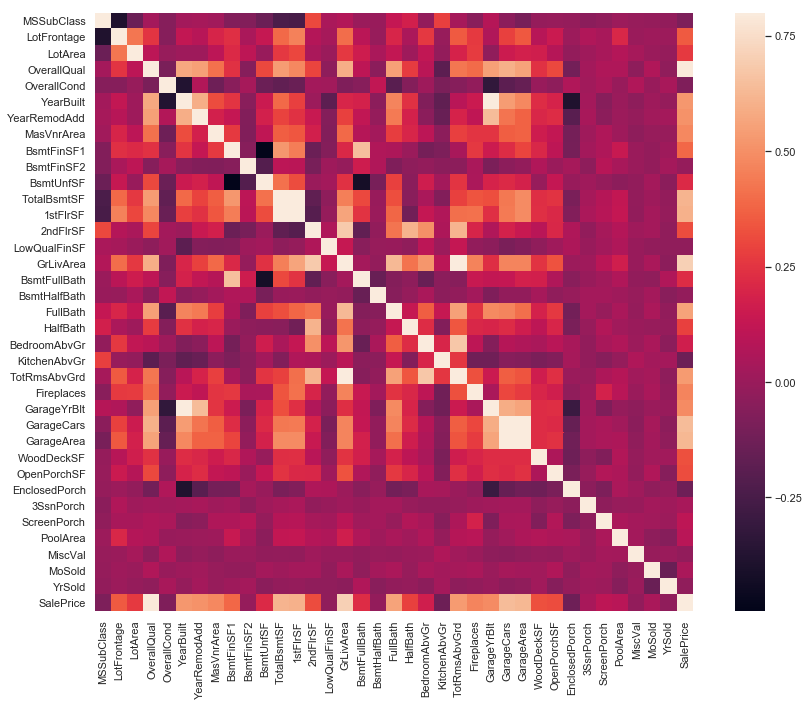

In [139]:
corr = data.corr()
plt.figure(figsize=(15, 11))
sns.heatmap(corr, vmax=.8, square=True);

Можно увидеть что пары `TotalBsmtSF`-`1stFlrSF` и `GarageYrBlt`-`YearBuilt` сильно скоррелированны, чтоне удивительно если посмотреть на их описание:

- __TotalBsmtSF__: Total square feet of basement area
- __1stFlrSF__: First Floor square feet


- __YearBuilt__: Original construction date
- __GarageYrBlt__: Year garage was built

Линейная зависимость признаков ([мультиколлениарность](https://ru.wikipedia.org/wiki/Мультиколлинеарность)) приводит к существованию множества эквивалентныъ решений задачи регрессии, а значит и к нестабильности. Поэтому, выбросим эти признаки:

In [140]:
data.drop(['TotalBsmtSF', 'GarageYrBlt'], 1, inplace=True)

## 2. Предобработка

Для того чтобы быстро оценить распределение удобно смотреть на [Box Plot](https://en.wikipedia.org/wiki/Box_plot), который показывает медиану, нижний и верхний квартили а также максимальное и минимальное значение и выбросы. Или можно попостроить гистограмы, чтобы понять вид распределения.

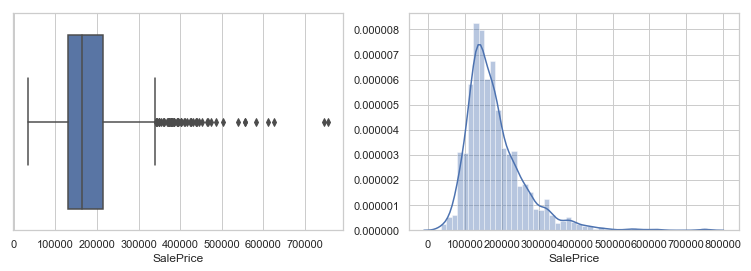

In [141]:
plt.figure(figsize=(13, 4))
plt.subplot(1, 2, 1)
sns.boxplot(data['SalePrice'])
plt.subplot(1, 2, 2)
sns.distplot(data['SalePrice']);

Распределение цен имеет достаточно тяжелый правый хвост, при оптимизации ошибки на таких объектах будут штрафоваться сильнее, поэтому прологарифмирем значние, чтобы получить более симметричное распределение.

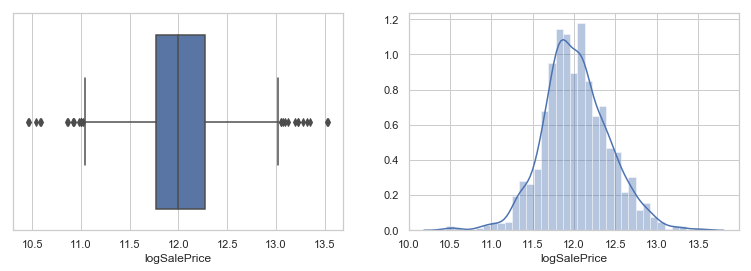

In [142]:
data['logSalePrice'] = np.log(data['SalePrice'])
plt.figure(figsize=(13, 4))
plt.subplot(1, 2, 1)
sns.boxplot(data['logSalePrice'])
plt.subplot(1, 2, 2)
sns.distplot(data['logSalePrice']);

### Пропуски в данных

Зачастую в реальных данных не для всех объектов известно значение того или иного признака. Такие объекты нужно обрабатывать прежде чем приступать к обучению. Для каждого признака посмотрим в скольки процентах объектах отсутствует значение.

In [143]:
clmns = data.columns[data.isnull().any()]
missed = pd.DataFrame(data[clmns].isnull().sum().sort_values(ascending=False) / data.shape[0], columns=['% NULL'])
missed

,% NULL
PoolQC,0.995205
MiscFeature,0.963014
Alley,0.937671
Fence,0.807534
FireplaceQu,0.472603
LotFrontage,0.177397
GarageType,0.055479
GarageFinish,0.055479
GarageQual,0.055479
GarageCond,0.055479


Некоторые признаки отсутствуют для большого числа объектов, поэтому имеет смысл их выкинуть.

In [144]:
data.drop(missed[missed['% NULL'] > 0.99].index, 1, inplace=True)

Оставшиеся пропуски заполним значением медианным значением для действительных значений и модой для категориальных.

In [145]:
fill = data.apply(lambda s: s.mode()[0] if s.dtype == 'object' else s.median(), axis=0)
data = data.fillna(value=fill)

### Категориальный признаки

Некоторые признаки в датасете являются категориальными и записаны в виде строчек. Такие признаки нужно сначала обработать чтобы обучить регрессию. Один из самых простых и распространненых $-$ _one-hot encoding_, им и воспользуемся. Для этого вместо каждого категориального признака необходимо создать $K$ новых признаков по количеству категорий в нем, затем для каждого объекта ставить 1 в столбец, соответствующий значению признака (категори), и 0 в остальные: 

![](https://i.imgur.com/mtimFxh.png)

In [146]:
cat_clmns = data.columns[data.dtypes == 'object']
data[cat_clmns].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Gd,Attchd,RFn,TA,TA,Y,MnPrv,Shed,WD,Normal
2,RL,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,TA,Attchd,RFn,TA,TA,Y,MnPrv,Shed,WD,Normal
3,RL,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,TA,Attchd,RFn,TA,TA,Y,MnPrv,Shed,WD,Normal
4,RL,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Gd,Detchd,Unf,TA,TA,Y,MnPrv,Shed,WD,Abnorml
5,RL,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,TA,Attchd,RFn,TA,TA,Y,MnPrv,Shed,WD,Normal


т.к. `OneHotEncoder` работает со значениями типа `int` необходимо сначала для каждого столбца "обучить" преобразования строк в целые значения и затем заменить на них исходные строки.

In [147]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [148]:
encoders = [LabelEncoder().fit(data[c]) for c in cat_clmns]
cat_fts = np.stack([enc.transform(data[c]) for enc, c in zip(encoders, cat_clmns)]).T

Теперь ко всем таким категориальным признакам применим One-Hot кодирование

In [149]:
ohe = OneHotEncoder()
ohe.fit(cat_fts)
cat_ohe = ohe.transform(cat_fts).toarray()

In [150]:
real_clmns = data.columns[data.dtypes != 'object']
a = pd.DataFrame(cat_ohe, index=data.index)
data = pd.concat([data[real_clmns], a], axis=1)

## 3. Обучение

В данном разделе мы разделим выборку на обучающую и тестовую и построим обычную линейную регрессию.

При разбиение выборки на тестовую и обучающую нужно быть внимательными. В данном случае мы решаем не просто задачу регресии, но прогнозирования, поэтому обучаться на данных за 2010 год и предсказывать значения цен для 2009 года смысла не очень много.

In [151]:
yrsold = data['YrSold']
sorted(yrsold.unique())

[2006, 2007, 2008, 2009, 2010]

In [152]:
train_x = data[data['YrSold'] <= 2009]
test_x = data[data['YrSold'] == 2010]

test_y = test_x['SalePrice']
train_y = train_x['SalePrice']

test_x, train_x = test_x.drop(['SalePrice', 'logSalePrice'], 1), train_x.drop(['SalePrice', 'logSalePrice'], 1)
train_idxs, val_idxs = np.where(train_x['YrSold'] < 2009)[0], np.where(train_x['YrSold'] == 2009)[0]

In [153]:
print('train_size = %.2f' % (train_idxs.shape[0]/data.shape[0]))
print('val_size = %.2f' % (val_idxs.shape[0]/data.shape[0]))
print('test_size = %.2f' % (test_x.shape[0]/data.shape[0]))

train_size = 0.65
val_size = 0.23
test_size = 0.12


т.к. метрика RMSE штрафует по-разному занижение и завышение цены, в качестве целевой метрики мы будем использовать MAPE, которая показывает ошибку в процентах от истинного значения.

$$ \text{MAPE} = \dfrac{1}{N} \sum_{i=1}^N \dfrac{|y - \bar{y} |}{y} $$

In [154]:
def mape(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

Обучим обычную линейную регрссию и сравним качство моделей обученных с логарифмированием целевой переменной и без. Метри для этого нужно, очевидно, считать в исходных значениях.

In [155]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score

lr = LinearRegression()
lr.fit(train_x, train_y)

test_p = lr.predict(test_x)
print('Using Y:')
print('Test MAPE %.2f%%' % mape(test_y, test_p))
print('Test RMSE %.3f' % mean_squared_error(test_y, test_p)**0.5)
print('Test RMSLE %.3f' % mean_squared_log_error(test_y, test_p)**0.5)
print('Test R2 %.3f\n' % r2_score(test_y, test_p))


lr.fit(train_x, np.log(train_y))
test_p = np.exp(lr.predict(test_x))
print('Using logY:')
print('Test MAPE %.2f%%' % mape(test_y, test_p))
print('Test RMSE %.3f' % mean_squared_error(test_y, test_p)**0.5)
print('Test RMSLE %.3f' % mean_squared_log_error(test_y, test_p)**0.5)
print('Test R2 %.3f' % r2_score(test_y, test_p))

Using Y:
Test MAPE 10.10%
Test RMSE 23777.780
Test RMSLE 0.136
Test R2 0.912

Using logY:
Test MAPE 8.71%
Test RMSE 22601.909
Test RMSLE 0.119
Test R2 0.921


## 5. Подбор гиперпараметров

Чтобы избежать переобучения к обычной линейной регрессии добавляют регуляризаторы, например $L_2$:

$$ \text{Loss} = \text{MSE} + \alpha \cdot L_2$$

$$ L_2 = \sum_{i=1}^{D} w_{i}^2 $$
$$ \text{MSE} = \sum_{i=1}^N (w^Tx_i - y_i)^2 $$

Но встает вопрос как выбрать коэфициент регуляризации $\alpha$. Если настраивать этот параметр по обучающей выборке, то лучшим вариантом будет $\alpha = 0$, т.к. можно лучше всего настроится под выборку, однако качество на тесте скорее всего упадет. Поэтому нужно пользоваться отложенной выборкой или кросс-валидации для подбора гиперпараметров.


![](images/K-fold_cross_validation.jpeg)


In [156]:
def mape_scorer(estimator, X_test, y_test):
    return -mape(np.exp(y_test), np.exp(estimator.predict(X_test)))

In [157]:
from sklearn.linear_model import RidgeCV, Ridge, LassoCV, ElasticNetCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV

params = {
    'alpha': np.logspace(-6, 3, 20)
}

cv = GridSearchCV(Ridge(), params, cv=[[train_idxs, val_idxs]], scoring=mape_scorer)
cv.fit(train_x, np.log(train_y));

/Users/andrew/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number9.407970e-18
  overwrite_a=True).T
/Users/andrew/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.800132e-17
  overwrite_a=True).T
/Users/andrew/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.432471e-17
  overwrite_a=True).T


In [158]:
cv_grid = pd.DataFrame(cv.cv_results_['params'])
cv_grid['val MAPE'] = -cv.cv_results_['mean_test_score']
cv_grid.head()

,alpha,val MAPE
0,0.000001,9.938779
1,0.000003,9.938779
2,0.000009,9.938780
3,0.000026,9.938780
4,0.000078,9.938782


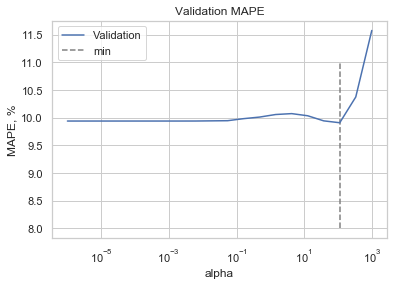

In [159]:
plt.title(r'Validation MAPE')
plt.semilogx(cv_grid['alpha'], cv_grid['val MAPE'], label='Validation')

best_l2 = cv.best_params_['alpha']
plt.vlines(best_l2, 8, 11, linestyles='--', color='gray', label='min')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('MAPE, %');

In [160]:
print('Test MAPE %.3f' % -mape_scorer(cv, test_x, np.log(test_y)))

Test MAPE 9.745


Посмотрим на 10 самых значимых признаков и их корреляции с объясняющей переменной:

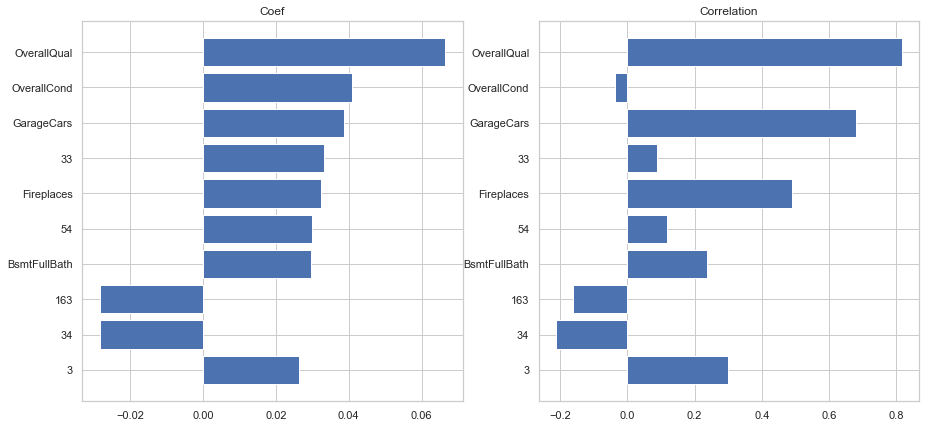

In [301]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.title('Coef')
w = cv.best_estimator_.coef_
arg = np.argsort(np.abs(w))[-10:]
clmns = train_x.columns.values[arg]
w = w[arg]

x = np.arange(len(w))
plt.barh(x, w)
plt.yticks(x, clmns);

plt.subplot(1, 2, 2)
plt.title('Correlation')
corr = data.corr()
x = np.arange(len(w))
plt.barh(x, corr['logSalePrice'][clmns])
plt.yticks(x, clmns);

## 6. Pipeline

Как мы увидели, процесс решения построения алгоритма машинного обучения от сырых данных до предсказания можно разделить на несколько этапов, например:

* Обработка/фильтрация данных
* Добавление новых признаков 
* ...
* Обучение алгоритма

Чтобы было удобнее, все этапы можно объединить в один [`Pipeline`](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html).

In [87]:
data = pd.read_csv('./data/train.csv', index_col='Id')

In [88]:
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin,BaseEstimator
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

UNIQUE = {c: data[c][~data[c].isna()].unique() for c in data.columns[data.dtypes == 'object']}

class MyTrandformer(TransformerMixin, BaseEstimator):
    def __init__(self, null_threshold):
        self.null_threshold = null_threshold
        self.drop_clmns = []
        self.encoder = None

    def transform(self, x, y=None):
        data = x.copy()
        
        data.drop(['TotalBsmtSF', 'GarageYrBlt'], 1, inplace=True, errors='ignore')
        data.drop(self.drop_clmns, 1, inplace=True)

        data = data.fillna(value=self.fill)

        cat_fts = np.stack([enc.transform(data[c]) for enc, c in zip(self.encoders, self.cat_clmns)]).T
        cat_ohe = self.ohe.transform(cat_fts).toarray()

        real_clmns = data.columns[data.dtypes != 'object']
        cat_ohe = pd.DataFrame(data=cat_ohe, index=data.index)
        data = pd.concat([data[real_clmns], cat_ohe], axis=1)
        
        return data
    
    def fit(self, x, y=None):
        data = x.copy()
        data.drop(['TotalBsmtSF', 'GarageYrBlt'], 1, inplace=True, errors='ignore')
        
        # drop and fill NULLs
        clmns = data.columns[data.isnull().any()]
        missed = pd.DataFrame(data[clmns].isnull().sum().sort_values(ascending=False) / data.shape[0], columns=['% NULL'])
        self.drop_clmns = missed[missed['% NULL'] > self.null_threshold].index
        data.drop(self.drop_clmns, 1, inplace=True)
        
        # Fill remaining NULLs
        self.fill = data.apply(lambda s: s.mode()[0] if s.dtype == 'object' else s.median(), axis=0)
        data = data.fillna(value=self.fill)
        
        # Encode categorical features (str -> int)
        self.cat_clmns = data.columns[data.dtypes == 'object']
        self.encoders = [LabelEncoder().fit(vals) for c, vals in UNIQUE.items() if c in self.cat_clmns]
        
        cat_fts = np.stack([enc.transform(data[c]) for enc, c in zip(self.encoders, self.cat_clmns)]).T

        self.ohe = OneHotEncoder(handle_unknown='ignore')
        self.ohe.fit(cat_fts)

        return self
    
    
class MyScaler(TransformerMixin, BaseEstimator):
    def __init__(self):
        self.scaler = StandardScaler()
        
    def transform(self, x, y=None):
        x = x.copy()
        x.loc[:, self.clmns] = self.scaler.transform(x[self.clmns])
        return x
    
    def fit(self, x, y=None):
        cond = x.dtypes == 'float'
        self.clmns = cond[cond].index
        self.scaler.fit(x[self.clmns])
        return self

In [89]:
train_x = data[data['YrSold'] <= 2009]
test_x = data[data['YrSold'] == 2010]

test_y = test_x['SalePrice']
train_y = train_x['SalePrice']

test_x, train_x = test_x.drop('SalePrice', 1), train_x.drop('SalePrice', 1)

In [90]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression



pipe = Pipeline([
    ('process', MyTrandformer(0.)),
    ('scale', MyScaler()),
    ('reg', LinearRegression())
])

## Зачем Pipeline?

* не нужно самому обучать и делать все преобразования
* очень просто перебирать комбинации методов и их параметры 

Выше мы выкидывали колонки с большим количеством `NULL` из общих соображений, сделав такой порог параметром нашего преобразования мы можем подобрать его по валидации с помощью уже знакомого `GridSearchCV`.

Помимо этого мы можем с легкостью перебрать какой регуляризатор использовать лучше: L2, L1 или вовсе без него.

In [91]:
# %debug

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso

params = [{
    'process__null_threshold': [0., 0.005, 0.1],
    'reg': [LinearRegression()]
}, {
    'process__null_threshold': [0., 0.005, 0.1, 0.5, 0.9],
    'reg': [Ridge(), Lasso()],
    'reg__alpha': np.logspace(-4, 4, 9)
}]
train_idxs, val_idxs = np.where(train_x['YrSold'] < 2009)[0], np.where(train_x['YrSold'] == 2009)[0]
cv = GridSearchCV(pipe, params, cv=[[train_idxs, val_idxs]], scoring=mape_scorer)
cv.fit(train_x, np.log(train_y))

GridSearchCV(cv=[[array([   0,    1, ..., 1283, 1284]), array([   5,    7, ..., 1279, 1282])]],
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('process', MyTrandformer(null_threshold=0.0)), ('scale', MyScaler()), ('reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'process__null_threshold': [0.0, 0.005, 0.1], 'reg': [LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)]}, {'process__null_threshold': [0.0, 0.005, 0.1, 0.5, 0.9], 'reg': [Ridge(alpha=10000.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False,...eg__alpha': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=<function mape_scorer at 0x11fcb8c80>, verbose=0)

Соберем итоги валидации в датафрейм, где каждая строчка это один запуск, а в колонках указаны параметры а также скор на валидации.

In [92]:
cv_grid = pd.DataFrame(cv.cv_results_['params'])
cv_grid['val MAPE'] = -cv.cv_results_['mean_test_score']
cv_grid['reg__alpha'] = cv_grid['reg__alpha'].fillna('0.')
cv_grid['reg'] = cv_grid['reg'].apply(lambda x: x.__class__.__name__)
cv_grid.head()

,process__null_threshold,reg,reg__alpha,val MAPE
0,0.000,LinearRegression,0.,9.590607
1,0.005,LinearRegression,0.,9.609439
2,0.100,LinearRegression,0.,9.894768
3,0.000,Ridge,0.0001,9.590605
4,0.000,Ridge,0.001,9.590589


С помощью [seaborn](https://seaborn.pydata.org) отобразим полоченные результаты.

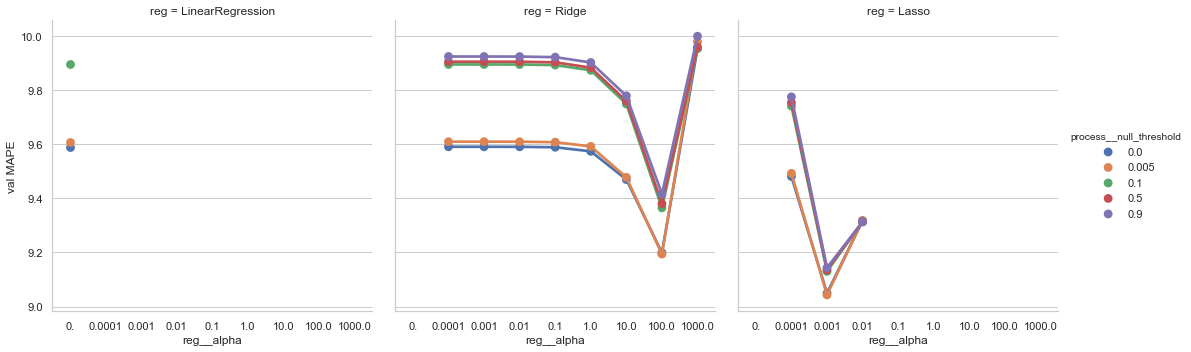

In [93]:
sns.catplot(x='reg__alpha', y='val MAPE', data=cv_grid[cv_grid['val MAPE'] < 12], col='reg',
            hue='process__null_threshold', kind='point')

In [94]:
cv.best_params_

{'process__null_threshold': 0.005,
 'reg': Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
    normalize=False, positive=False, precompute=False, random_state=None,
    selection='cyclic', tol=0.0001, warm_start=False),
 'reg__alpha': 0.001}

In [95]:
print('Test MAPE %.3f' % -mape_scorer(cv, test_x, np.log(test_y)))

Test MAPE 8.590
